In [141]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import json
import numpy as np
import matplotlib.pyplot as plt

In [142]:
all_features = pd.read_csv('osmia_all_features.csv')
all_features

,system:index,NDBI,NDVI,NDWI,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,date,.geo
0,00000000000000000d6b,0.012923,0.128575,-0.151654,9330.952027,10079.580102,10300.693969,13372.233049,43711.751823,2023-04-16,"{""type"":""Point"",""coordinates"":[8.8140285880811..."
1,00000000000000000346,0.012744,-0.004203,0.026904,7633.400890,8249.259840,7684.539326,7620.211010,40548.808706,2023-05-07,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
2,00000000000000000373,0.060222,0.007461,-0.050529,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,2023-04-09,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
3,000000000000000004a9,0.060222,0.007461,-0.050529,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,2023-04-05,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
4,0000000000000000066b,0.060222,0.007461,-0.050529,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,2023-04-08,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
...,...,...,...,...,...,...,...,...,...,...,...
13924,000000000000000013f7,-0.201913,0.347359,-0.127259,8251.658720,9346.566089,8774.158264,18543.617348,43174.995863,2022-05-02,"{""type"":""Point"",""coordinates"":[6.0000013907777..."
13925,00000000000000001443,-0.201913,0.347359,-0.127259,8251.658720,9346.566089,8774.158264,18543.617348,43174.995863,2022-04-24,"{""type"":""Point"",""coordinates"":[6.0000013907777..."
13926,000000000000000018bf,-0.092041,0.251487,-0.147857,8415.210855,9516.334058,9199.280205,15817.654302,39353.151672,2021-04-18,"{""type"":""Point"",""coordinates"":[6.0000013907777..."
13927,00000000000000002261,-0.226406,0.382861,-0.131456,8097.958699,9204.223406,8419.621205,19700.455578,40356.454035,2020-04-26,"{""type"":""Point"",""coordinates"":[6.0000013907777..."


In [143]:

all_features = all_features[['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI',  
         'date', '.geo']]
all_features['geometry'] = all_features['.geo'].apply(lambda x: Point(json.loads(x)['coordinates']))
all_features = all_features.drop(columns='.geo')
gdf = gpd.GeoDataFrame(all_features, geometry='geometry')
gdf = gdf.dropna()
gdf.set_crs(epsg=4326, inplace=True)
gdf


,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,date,geometry
0,9330.952027,10079.580102,10300.693969,13372.233049,43711.751823,0.012923,0.128575,-0.151654,2023-04-16,POINT (8.81403 53.10215)
1,7633.400890,8249.259840,7684.539326,7620.211010,40548.808706,0.012744,-0.004203,0.026904,2023-05-07,POINT (3.40000 51.50000)
2,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,0.060222,0.007461,-0.050529,2023-04-09,POINT (3.40000 51.50000)
3,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,0.060222,0.007461,-0.050529,2023-04-05,POINT (3.40000 51.50000)
4,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,0.060222,0.007461,-0.050529,2023-04-08,POINT (3.40000 51.50000)
...,...,...,...,...,...,...,...,...,...,...
13924,8251.658720,9346.566089,8774.158264,18543.617348,43174.995863,-0.201913,0.347359,-0.127259,2022-05-02,POINT (6.00000 51.85000)
13925,8251.658720,9346.566089,8774.158264,18543.617348,43174.995863,-0.201913,0.347359,-0.127259,2022-04-24,POINT (6.00000 51.85000)
13926,8415.210855,9516.334058,9199.280205,15817.654302,39353.151672,-0.092041,0.251487,-0.147857,2021-04-18,POINT (6.00000 51.85000)
13927,8097.958699,9204.223406,8419.621205,19700.455578,40356.454035,-0.226406,0.382861,-0.131456,2020-04-26,POINT (6.00000 51.85000)


In [144]:
import rasterio

with rasterio.open('/home/mpgetz/file_share/train/repos/bee_mapping/data/wc2.1_30s_bio/wc2.1_30s_bio_1.tif') as dataset:
    # Pixel width and height (resolution) in geographic units
    lat_resolution, long_resolution = dataset.res[0], dataset.res[1]
    transform = dataset.transform
    pixel_size_x, pixel_size_y = dataset.res
    raster_crs = dataset.crs

In [145]:
gdf

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,date,geometry
0,9330.952027,10079.580102,10300.693969,13372.233049,43711.751823,0.012923,0.128575,-0.151654,2023-04-16,POINT (8.81403 53.10215)
1,7633.400890,8249.259840,7684.539326,7620.211010,40548.808706,0.012744,-0.004203,0.026904,2023-05-07,POINT (3.40000 51.50000)
2,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,0.060222,0.007461,-0.050529,2023-04-09,POINT (3.40000 51.50000)
3,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,0.060222,0.007461,-0.050529,2023-04-05,POINT (3.40000 51.50000)
4,11098.012508,13284.355593,12835.418345,13026.272560,34408.455162,0.060222,0.007461,-0.050529,2023-04-08,POINT (3.40000 51.50000)
...,...,...,...,...,...,...,...,...,...,...
13924,8251.658720,9346.566089,8774.158264,18543.617348,43174.995863,-0.201913,0.347359,-0.127259,2022-05-02,POINT (6.00000 51.85000)
13925,8251.658720,9346.566089,8774.158264,18543.617348,43174.995863,-0.201913,0.347359,-0.127259,2022-04-24,POINT (6.00000 51.85000)
13926,8415.210855,9516.334058,9199.280205,15817.654302,39353.151672,-0.092041,0.251487,-0.147857,2021-04-18,POINT (6.00000 51.85000)
13927,8097.958699,9204.223406,8419.621205,19700.455578,40356.454035,-0.226406,0.382861,-0.131456,2020-04-26,POINT (6.00000 51.85000)


In [146]:
gdf = gdf.to_crs(raster_crs)
def align_to_raster(row, transform):
    x, y = row.geometry.x, row.geometry.y

    # Inverse transform to get row and col in raster space
    row, col = ~transform * (x, y)
    row, col = np.round(row), np.round(col)  # Round to nearest pixel

    # Transform back to raster CRS
    x_aligned, y_aligned = transform * (col, row)
    return Point(x_aligned, y_aligned)

gdf['aligned_geometry'] = gdf.apply(align_to_raster, transform=transform, axis=1)
gdf_unique = gdf.drop_duplicates(subset=['aligned_geometry'])
gdf_unique
# gdf_filtered = gdf_unique[['lat', 'long']]

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,date,geometry,aligned_geometry
0,9330.952027,10079.580102,10300.693969,13372.233049,43711.751823,0.012923,0.128575,-0.151654,2023-04-16,POINT (8.81403 53.10215),POINT (-143.100 -98.817)
1,7633.400890,8249.259840,7684.539326,7620.211010,40548.808706,0.012744,-0.004203,0.026904,2023-05-07,POINT (3.40000 51.50000),POINT (-141.500 -93.400)
23,25998.905678,26617.620128,26444.274783,28857.975594,33964.252746,-0.110091,0.045873,0.068556,2022-04-09,POINT (7.15992 50.79019),POINT (-140.792 -97.158)
25,8401.848555,9712.517172,9035.822780,20081.536259,42036.516196,-0.207873,0.375642,-0.147509,2023-04-22,POINT (6.75000 52.15000),POINT (-142.150 -96.750)
27,34528.594406,33090.157765,33008.119650,33224.717283,34186.489895,-0.224976,0.003341,0.223080,2018-04-02,POINT (8.48918 47.38758),POINT (-137.392 -98.492)
...,...,...,...,...,...,...,...,...,...,...,...
13906,31928.060320,31129.448511,31210.913187,32405.762311,32133.696977,-0.071498,0.018995,0.051218,2023-04-07,POINT (9.20724 48.77403),POINT (-138.775 -99.208)
13908,9728.772180,10948.644715,10543.286076,20878.407037,39732.465704,-0.208826,0.325273,-0.107236,2021-04-18,POINT (4.95000 52.90000),POINT (-142.900 -94.950)
13909,12432.674092,14217.992694,14353.866414,19554.860325,42920.286584,-0.059347,0.152014,-0.098157,2013-05-03,POINT (4.67096 50.87770),POINT (-140.875 -94.675)
13922,8415.210855,9516.334058,9199.280205,15817.654302,39353.151672,-0.092041,0.251487,-0.147857,2021-04-20,POINT (6.00000 51.85000),POINT (-141.850 -96.000)


In [147]:
gdf = gdf_unique

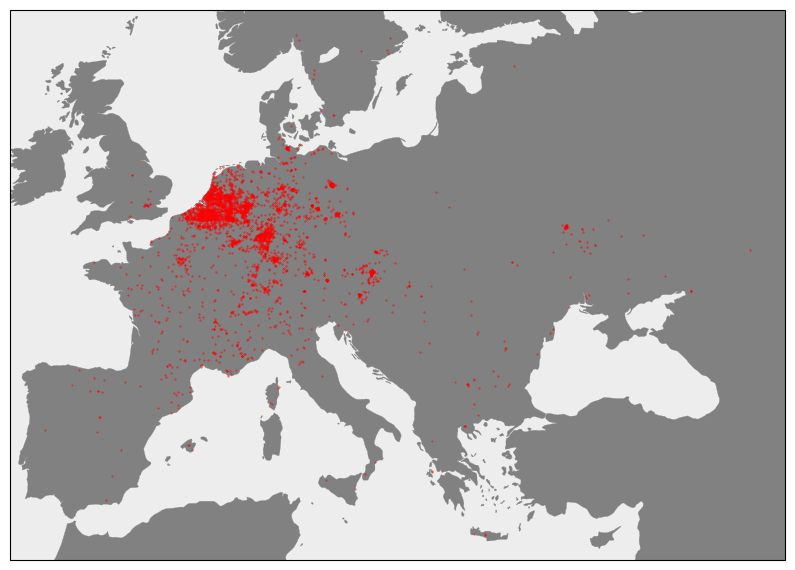

In [148]:

import cartopy.feature as cfeature
import cartopy.crs as ccrs

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

gdf.plot(ax=ax, markersize=.11, c='r') 

plt.show()

In [149]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# feature_matrix = gdf[['x', 'y', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI']].copy()
feature_matrix = gdf[['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI']].copy() # without lat/lon
# feature_matrix = gdf[['ST_B10', 'NDBI', 'NDVI', 'NDWI']].copy() # metrics only

# log scale?
feature_matrix['SR_B2'] = np.log(gdf['SR_B2'] + 1)
feature_matrix['SR_B3'] = np.log(gdf['SR_B3'] + 1)
feature_matrix['SR_B4'] = np.log(gdf['SR_B4'] + 1)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_matrix_scaled = scaler.fit_transform(feature_matrix)
feature_matrix_scaled

array([[-0.56323021, -0.65342523, -0.57656158, ...,  1.56082502,
        -0.50201403, -0.61551854],
       [-0.92152226, -1.05636723, -1.15329335, ...,  1.558882  ,
        -1.57084504,  0.56699306],
       [ 1.26525841,  1.29928391,  1.27935891, ...,  0.22717707,
        -1.16774842,  0.84283345],
       ...,
       [-0.0511417 ,  0.03830381,  0.07657661, ...,  0.77731154,
        -0.31334147, -0.2612278 ],
       [-0.74754171, -0.76905141, -0.79915806, ...,  0.4228695 ,
         0.48739126, -0.59036879],
       [ 1.3150621 ,  1.28379429,  1.28206915, ...,  0.51098862,
        -1.27804764,  0.72393612]])

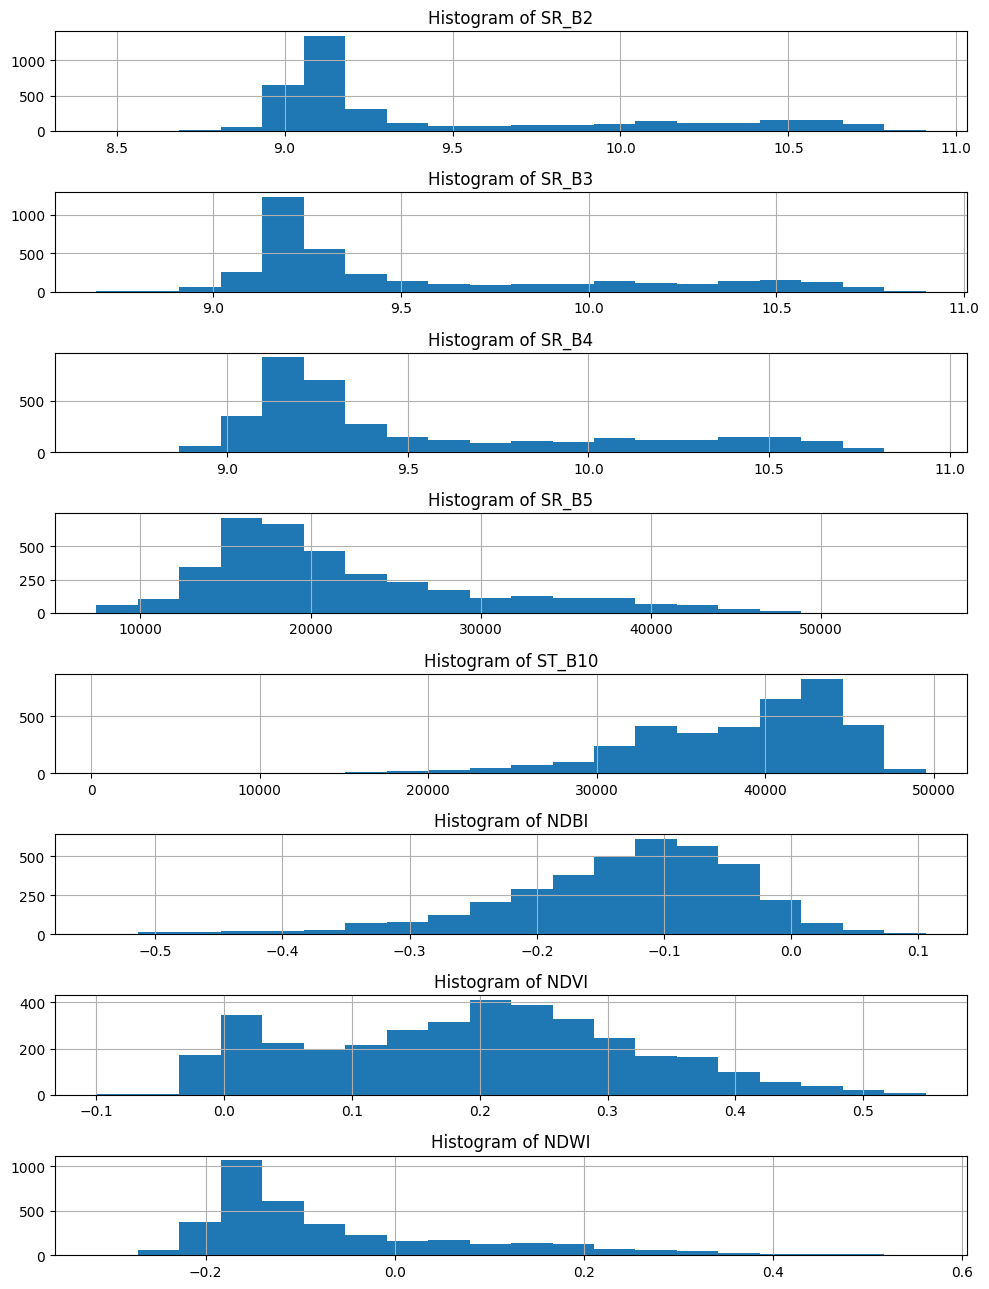

In [151]:
plt.figure(figsize=(10, 1 * len(gdf.columns)))

# Iterate over the columns
for i, column in enumerate(feature_matrix.columns):
    # Create a subplot for each column
    plt.subplot(len(feature_matrix.columns), 1, i + 1)
    # Plot the histogram
    feature_matrix[column].hist(bins=20)
    # Set title
    plt.title(f'Histogram of {column}')

# Adjust layout for better readability
plt.tight_layout()

In [152]:
from sklearn.cluster import DBSCAN

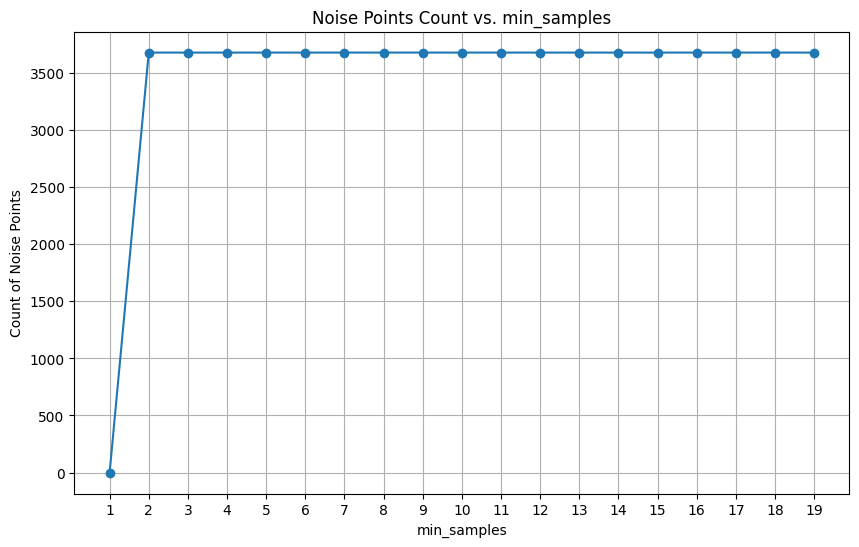

In [153]:


noise_counts = []

for i in range(1,20):
    dbscan = DBSCAN(eps=0.01, min_samples=i)
    cluster_labels = dbscan.fit_predict(feature_matrix_scaled)     
    gdf['db_cluster'] = cluster_labels
    noise_count = np.sum(cluster_labels == -1)
    noise_counts.append(noise_count)

plt.figure(figsize=(10, 6))
plt.plot(range(1,20), noise_counts, marker='o')
plt.title('Noise Points Count vs. min_samples')
plt.xlabel('min_samples')
plt.ylabel('Count of Noise Points')
plt.xticks(range(1,20))
plt.grid(True)
plt.show()


In [154]:
gdf.describe()

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,x,y,db_cluster
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.0
mean,15376.363480,16085.076725,16005.797116,21807.020529,38550.122124,-0.131046,0.190940,-0.058711,8.021220,50.149464,-1.0
std,10832.836801,9870.921085,9967.481558,8035.534536,6188.173697,0.092252,0.124245,0.151020,5.107407,2.382066,0.0
min,4625.099067,5933.125271,5640.407656,7417.646979,293.000000,-0.546346,-0.100069,-0.315734,-7.537370,35.233114,-1.0
25%,8716.391252,9787.085738,9573.501328,16175.144791,34537.509725,-0.180453,0.091015,-0.163908,4.891344,49.243721,-1.0
50%,9380.760766,10719.369441,10740.438269,19411.458705,40238.414484,-0.116766,0.198805,-0.119748,6.945121,50.851651,-1.0
75%,19405.833024,19835.430637,19845.510931,25548.233016,43338.716313,-0.067715,0.274062,0.008562,9.603276,51.530714,-1.0
max,54658.581552,54059.308704,56045.026575,56141.281637,49533.583594,0.105792,0.549005,0.561797,43.974865,59.916999,-1.0


In [155]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=120)
clusters = clusterer.fit_predict(feature_matrix_scaled)
gdf['cluster'] = clusters
gdf.describe()

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,x,y,db_cluster,cluster
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.0,3677.000000
mean,15376.363480,16085.076725,16005.797116,21807.020529,38550.122124,-0.131046,0.190940,-0.058711,8.021220,50.149464,-1.0,0.279576
std,10832.836801,9870.921085,9967.481558,8035.534536,6188.173697,0.092252,0.124245,0.151020,5.107407,2.382066,0.0,0.902270
min,4625.099067,5933.125271,5640.407656,7417.646979,293.000000,-0.546346,-0.100069,-0.315734,-7.537370,35.233114,-1.0,-1.000000
25%,8716.391252,9787.085738,9573.501328,16175.144791,34537.509725,-0.180453,0.091015,-0.163908,4.891344,49.243721,-1.0,-1.000000
50%,9380.760766,10719.369441,10740.438269,19411.458705,40238.414484,-0.116766,0.198805,-0.119748,6.945121,50.851651,-1.0,1.000000
75%,19405.833024,19835.430637,19845.510931,25548.233016,43338.716313,-0.067715,0.274062,0.008562,9.603276,51.530714,-1.0,1.000000
max,54658.581552,54059.308704,56045.026575,56141.281637,49533.583594,0.105792,0.549005,0.561797,43.974865,59.916999,-1.0,1.000000


In [156]:
gdf[gdf['cluster'] == -1].describe()

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,x,y,db_cluster,cluster
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.0
mean,21955.609808,22198.313365,22172.942670,26291.849451,33038.319412,-0.180367,0.113096,0.068004,7.982996,50.026429,-1.0,-1.0
std,12405.820700,11152.985009,11196.904697,9305.566305,6733.632547,0.120470,0.116448,0.176693,5.387027,2.417805,0.0,0.0
min,4625.099067,5933.125271,5640.407656,7417.646979,293.000000,-0.546346,-0.100069,-0.315734,-5.079487,35.233114,-1.0,-1.0
25%,10823.003964,12951.022665,13163.840691,20624.721671,29327.485347,-0.258713,0.020284,-0.070251,4.700000,49.030094,-1.0,-1.0
50%,18471.535732,19159.706180,19118.840673,25349.197328,33236.745923,-0.173374,0.089623,0.039867,6.789945,50.780481,-1.0,-1.0
75%,31722.765356,30622.366175,30393.700926,32361.410717,38109.109488,-0.089263,0.175509,0.195642,9.279684,51.483433,-1.0,-1.0
max,54658.581552,54059.308704,56045.026575,56141.281637,49533.583594,0.105792,0.549005,0.561797,43.974865,59.726002,-1.0,-1.0


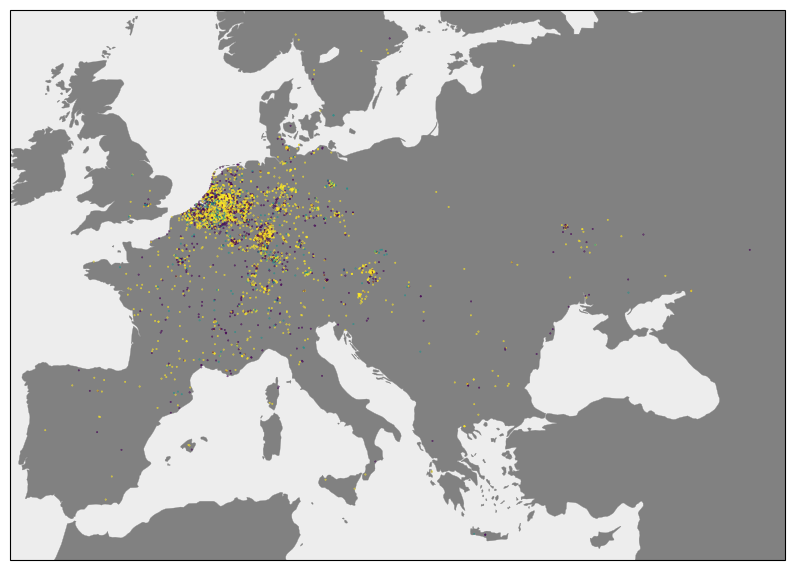

In [157]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

gdf.plot(ax=ax, markersize=.11, c=gdf['cluster']) 

plt.show()

In [158]:
# from sklearn.cluster import KMeans

# inertias = []
# range_of_clusters = range(1, 10)  # Example range, adjust as needed

# for k in range_of_clusters:
#     kmeans = KMeans(n_clusters=k).fit(feature_matrix_scaled)
#     inertias.append(kmeans.inertia_)

# plt.figure(figsize=(8, 4))
# plt.plot(range_of_clusters, inertias, '-o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Plot')
# plt.show()

/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


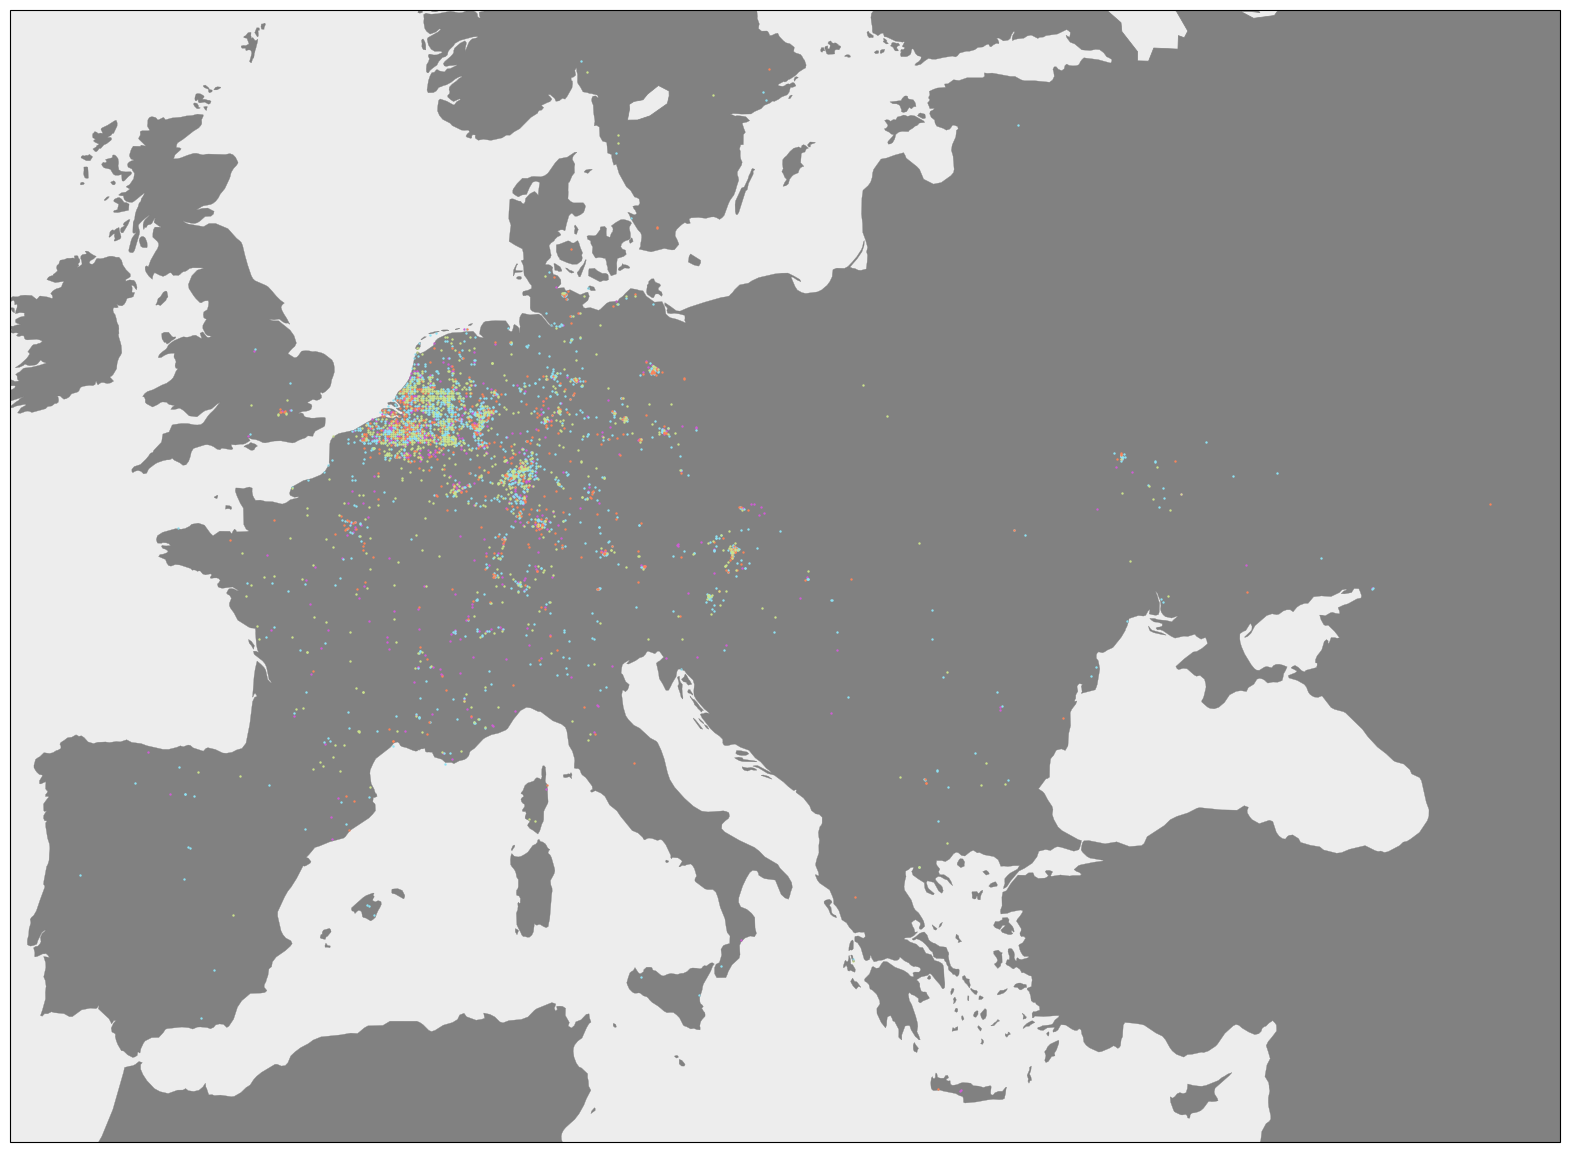

In [159]:
colors = ['#D15CD7', '#8EE3F5', '#FC8559', '#CCE38D']

kmeans = KMeans(n_clusters=4)
gdf['k_cluster'] = kmeans.fit_predict(feature_matrix_scaled)

centroids = kmeans.cluster_centers_

gdf['cluster_color'] = gdf['k_cluster'].map(dict(enumerate(colors)))

plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

for color in colors:
    gdf_subset = gdf[gdf['cluster_color'] == color]
    gdf_subset.plot(ax=ax, markersize=.5, color=color)

In [163]:
gdf['k_cluster'].value_counts()

k_cluster
1    1518
3    1000
2     595
0     564
Name: count, dtype: int64

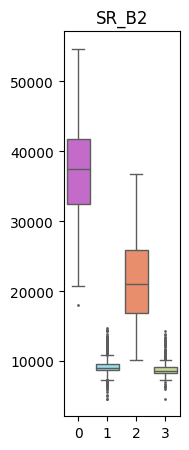

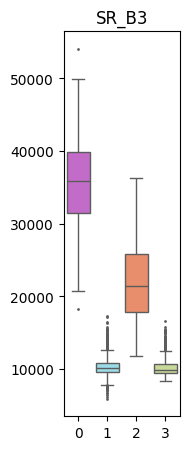

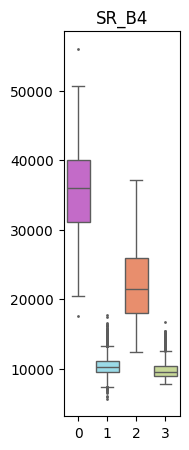

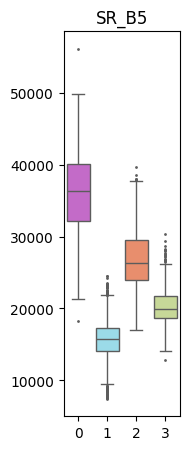

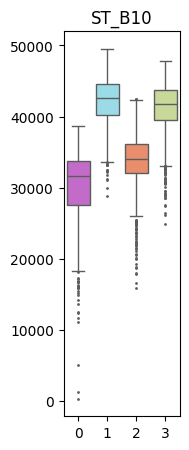

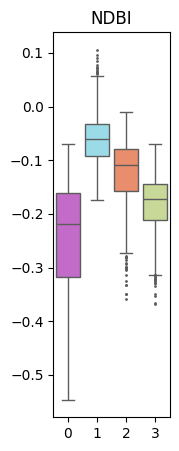

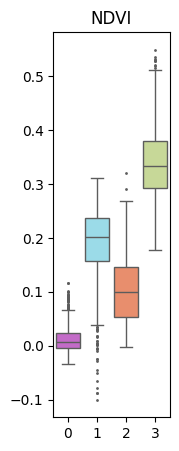

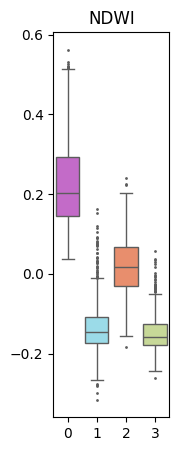

In [160]:
colors = ['#D15CD7', '#8EE3F5', '#FC8559', '#CCE38D']
gdf_subset = gdf[['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI', 'k_cluster']]

import seaborn as sns
for feature in gdf_subset.columns[:-1]:
    plt.figure(figsize=(1.5, 5))
    sns.boxplot(x='k_cluster', y=feature, data=gdf_subset, fliersize=1, hue='k_cluster', palette=colors)
    plt.title(f'{feature}')
    plt.legend([],[], frameon=False)
    plt.xlabel('')  
    plt.ylabel('') 




/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.

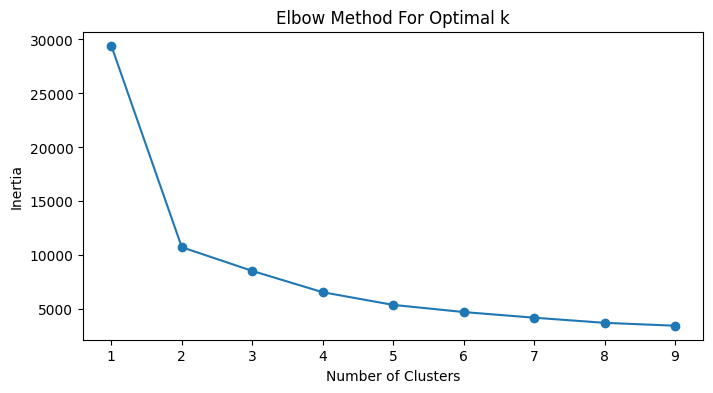

In [161]:
inertias = []
range_of_clusters = range(1, 10)  # Example range, adjust as needed

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k).fit(feature_matrix_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range_of_clusters, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [162]:
gdf_out_k_4 = gdf[['x', 'y', 'k_cluster']].to_csv('cluster_k_4.csv')